## Todos

- calculate centrality measure only once
- replace randomize_graph in basic_graph_analyzer.py by utils function

In [1]:
from src.analysis.basic_graph_analyzer import BasicGraphAnalyzer
from src.analysis.centrality_analyzer import CentralityAnalyzer
from src.analysis.scale_free_analyzer import ScaleFreeAnalyzer
from graph_tool import openmp_set_num_threads
from graph_tool.all import load_graph
import numpy as np


In [2]:
# Set the number of threads to use
openmp_set_num_threads(8)

In [3]:
main_category = 'Amiga CD32 games'
file_path = f'outputs/graphs/{main_category.replace(" ", "_")}.gt'
G = load_graph(file_path)

num_nodes = G.num_vertices()
num_edges = G.num_edges()
degrees = G.get_total_degrees(G.get_vertices())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

avg_degree = np.mean(degrees)
min_degree = np.min(degrees)
max_degree = np.max(degrees)
median_degree = np.median(degrees)
    

print("\nDegree Statistics:")
print(f"Minimum degree: {min_degree}")
print(f"Maximum degree: {max_degree}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Median degree: {median_degree:.2f}")


Number of nodes: 8013
Number of edges: 1537410

Degree Statistics:
Minimum degree: 10
Maximum degree: 7969
Average degree: 383.73
Median degree: 242.00


Processing vertices: 100%|██████████| 8013/8013 [00:13<00:00, 575.73vertex/s]


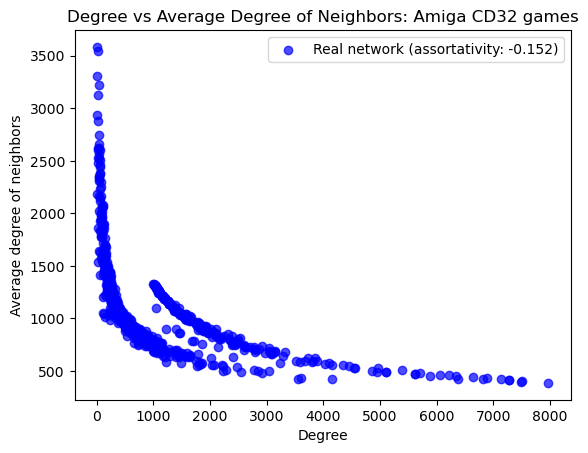

Processing vertices: 100%|██████████| 8013/8013 [00:13<00:00, 577.27vertex/s]


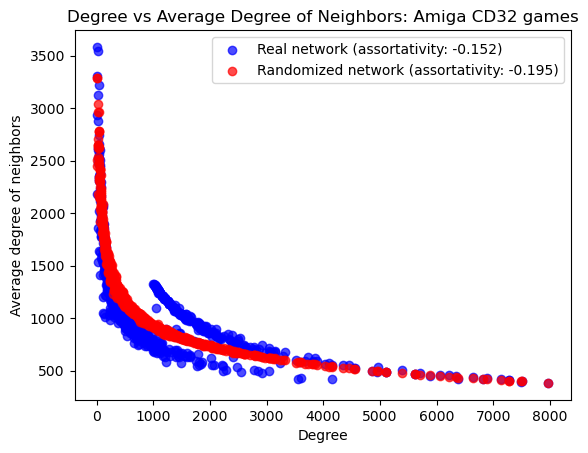

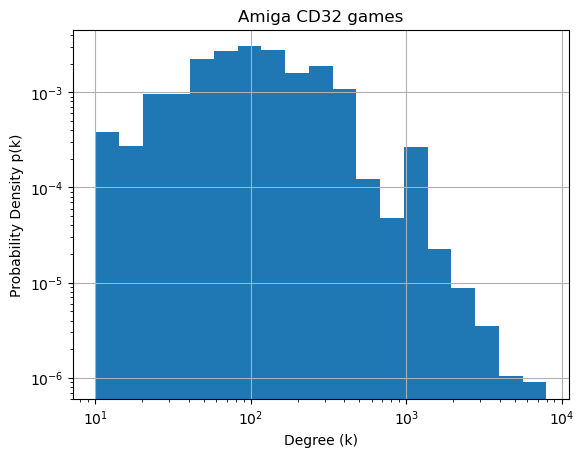

In [4]:
basic_graph_analyzer = BasicGraphAnalyzer(G)
basic_graph_analyzer.plot_degree_vs_avg_degree(f"Degree vs Average Degree of Neighbors: {main_category}")
basic_graph_analyzer.plot_degree_vs_avg_degree(f"Degree vs Average Degree of Neighbors: {main_category}", plot_randomized=True)
basic_graph_analyzer.plot_log_log_probability_density(main_category)

Calculating degrees...
Degrees calculated in 0.00 seconds.

Calculating eigenvector...
Eigenvector centrality calculated in 0.04 seconds.

Calculating closeness...
Closeness centrality calculated in 14.50 seconds.

Calculating betweenness...
Betweenness centrality calculated in 19.48 seconds.



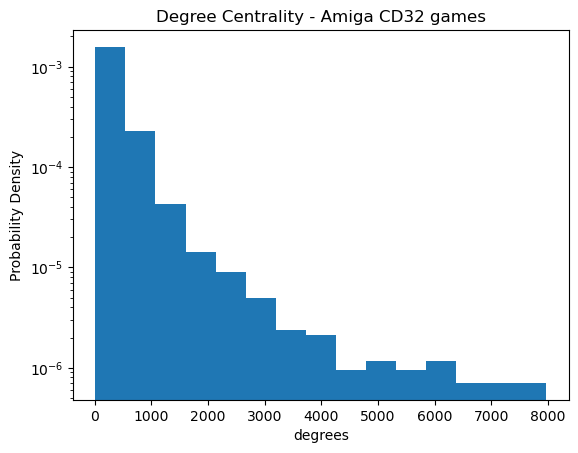

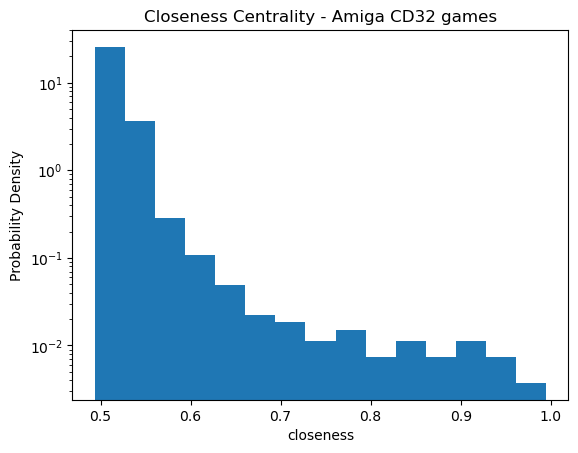

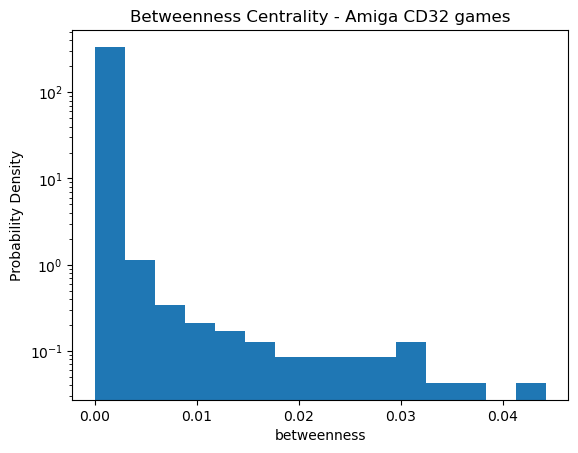

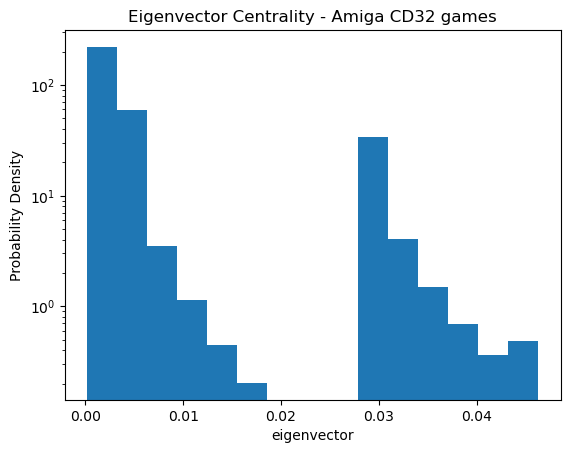

Calculating degrees...
Degrees calculated in 0.00 seconds.

Calculating eigenvector...
Eigenvector centrality calculated in 0.03 seconds.

Calculating closeness...
Closeness centrality calculated in 14.77 seconds.

Calculating betweenness...
Betweenness centrality calculated in 21.18 seconds.



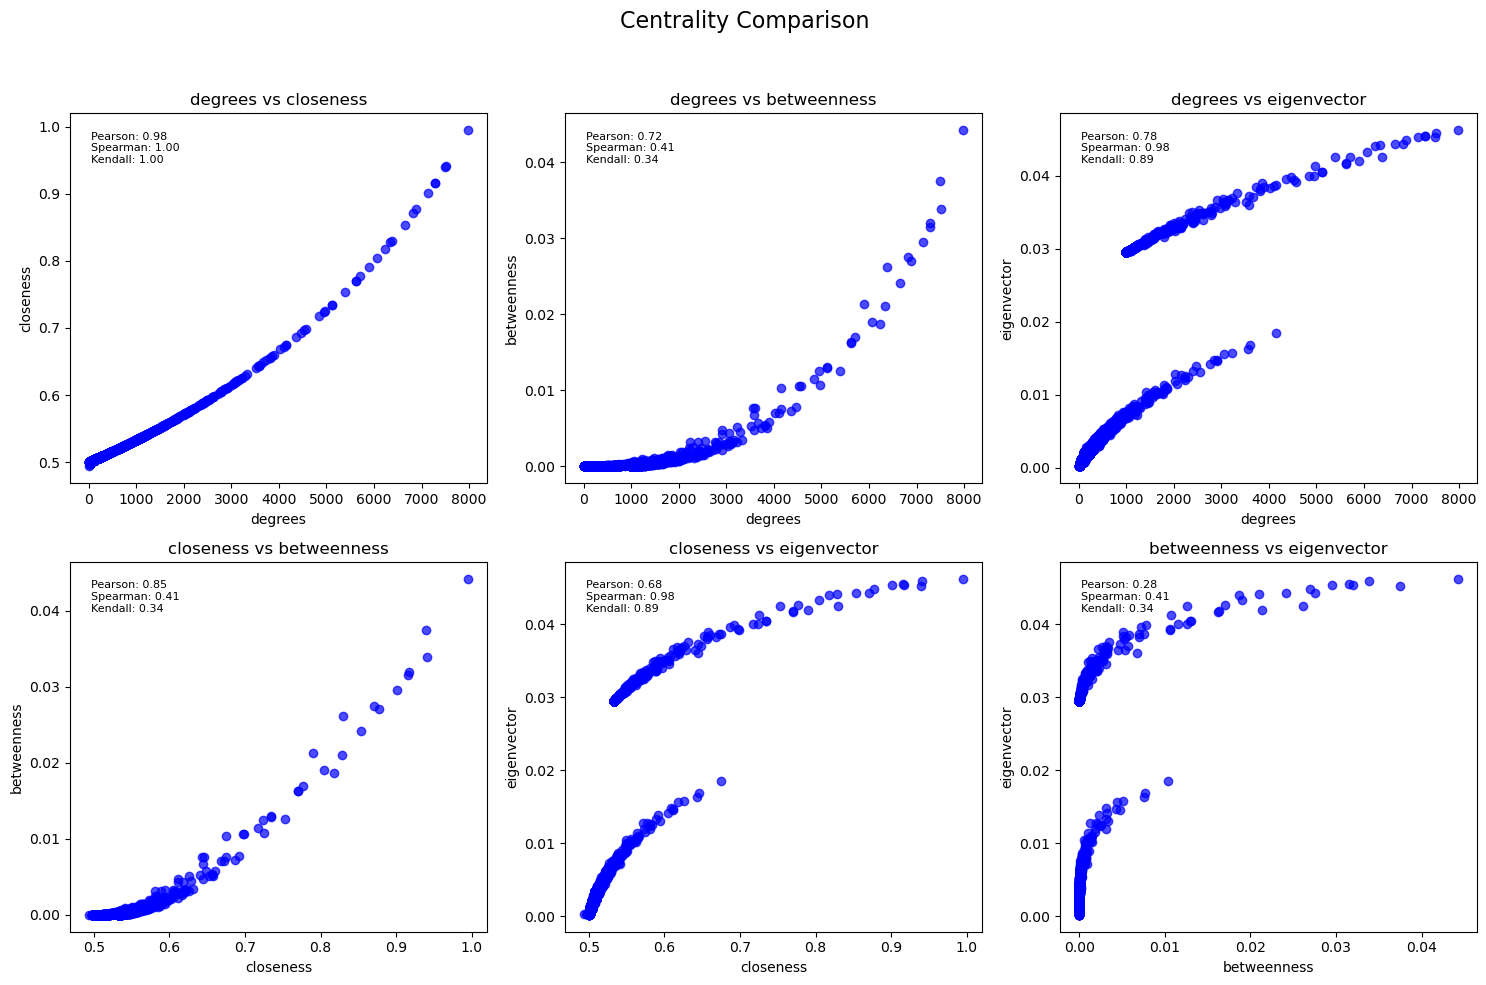

Calculating degrees...
Degrees calculated in 0.00 seconds.

Calculating eigenvector...
Eigenvector centrality calculated in 0.03 seconds.

Calculating closeness...
Closeness centrality calculated in 15.41 seconds.

Calculating betweenness...
Betweenness centrality calculated in 21.63 seconds.

Calculating degrees...
Degrees calculated in 0.00 seconds.

Calculating eigenvector...
Eigenvector centrality calculated in 0.02 seconds.

Calculating closeness...
Closeness centrality calculated in 15.28 seconds.

Calculating betweenness...
Betweenness centrality calculated in 31.96 seconds.



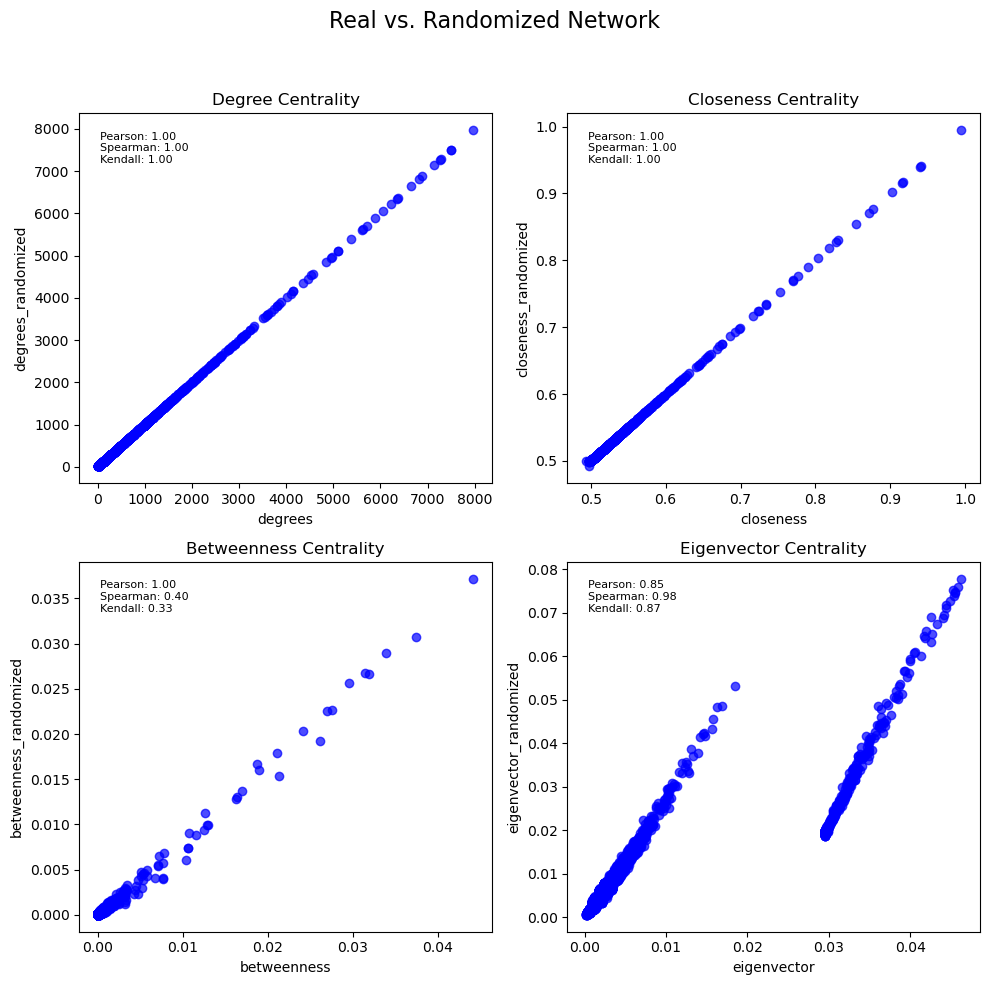

In [5]:
centrality_analyzer = CentralityAnalyzer(G, network_name=main_category)
centrality_analyzer.plot_centralities()
centrality_analyzer.plot_centralities_comparison()
centrality_analyzer.plot_centralities_comparison_randomized()

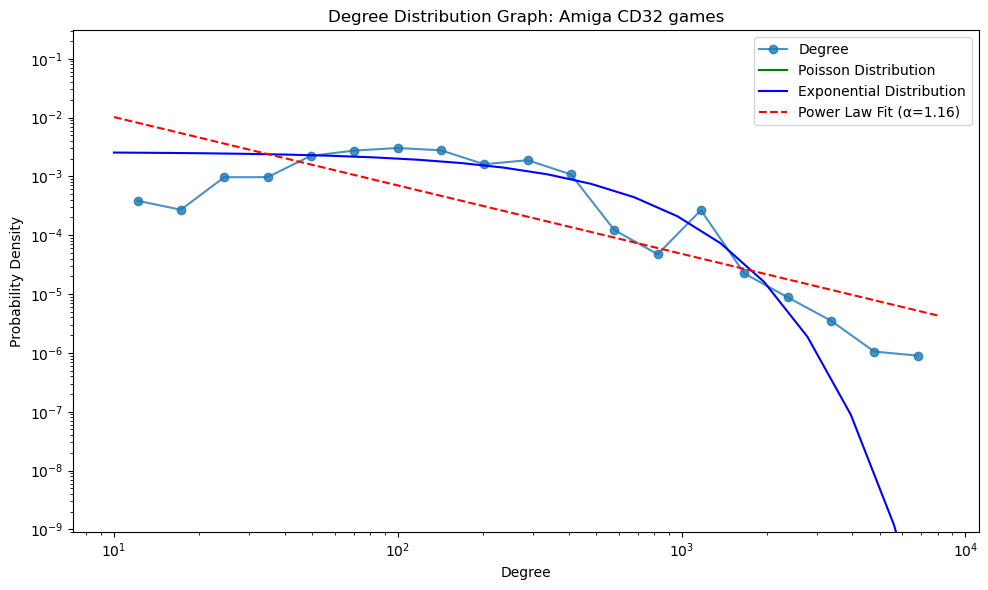


Power Law Analysis:
Minimum degree considered (xmin): 1
Number of nodes in tail: 8013
Power law exponent (α): 1.162 ± 0.002


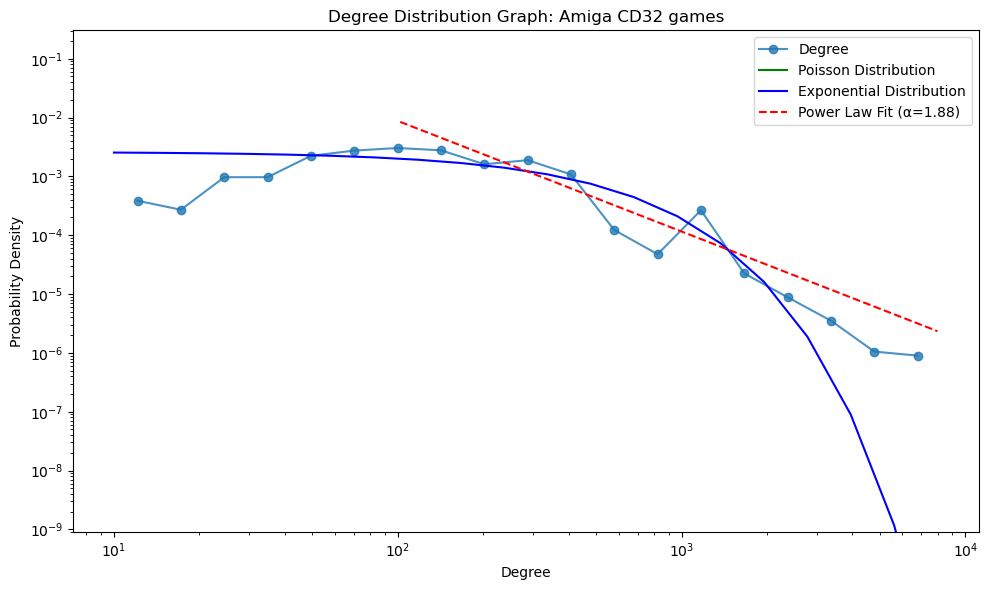


Power Law Analysis:
Minimum degree considered (xmin): 100
Number of nodes in tail: 6705
Power law exponent (α): 1.879 ± 0.011


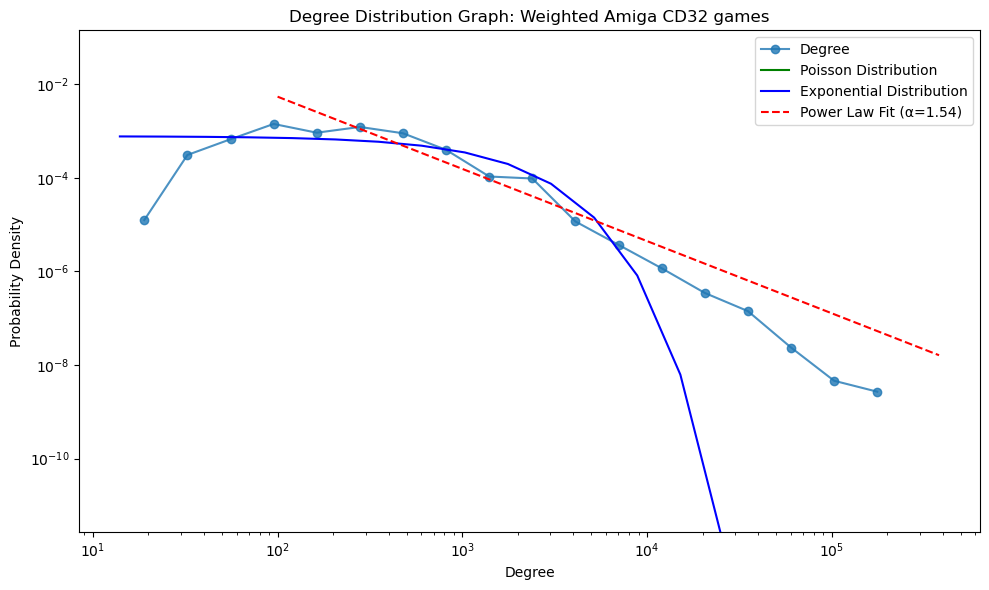


Power Law Analysis:
Minimum degree considered (xmin): 100
Number of nodes in tail: 7501
Power law exponent (α): 1.542 ± 0.006


In [10]:
scale_free_analyzer = ScaleFreeAnalyzer(G)
scale_free_analyzer.plot_degree_distribution(main_category)

scale_free_analyzer.set_filter(10**2)
scale_free_analyzer.plot_degree_distribution(main_category)

file_path = f'outputs/graphs/{main_category.replace(" ", "_")}-weighted.gt'
G = load_graph(file_path)
scale_free_analyzer = ScaleFreeAnalyzer(G, is_weighted=True)
scale_free_analyzer.set_filter(10**2)
scale_free_analyzer.plot_degree_distribution(f'Weighted {main_category}')
